<a href="https://colab.research.google.com/github/jamal221/Machine_Learning_Project/blob/main/SeoulBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seoul Bike Demand (45 points total)

We read the data from `SeoulBikeData.csv` into a pandas DataFrame and check a few sample rows.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/CSV_Files/")

In [3]:
import pandas as pd
df = pd.read_csv('SeoulBikeData.csv')
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [9]:
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [13]:
df.describe()
# Only for numeric data therefore is not suitable for object

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


The raw data are hourly bike demand with weather information and categories of days. We will aggregate the data into daily by taking the following steps.

Step 1: We extract a summary of select weather variables.

In [14]:
df_daily = df.rename(columns={'Date':'DateStr'}).groupby('DateStr')\
.agg({'Rented Bike Count': 'sum', 'Temperature(C)': 'mean', 'Wind speed (m/s)': 'mean', 'Dew point temperature(C)': 'mean'})
df_daily.head()

,Rented Bike Count,Temperature(C),Wind speed (m/s),Dew point temperature(C)
DateStr,,,,
01/01/2018,4290,-1.283333,1.454167,-13.866667
01/02/2018,5377,-3.866667,1.608333,-15.012500
01/03/2018,5132,0.450000,3.554167,-6.387500
01/04/2018,17388,15.183333,1.570833,9.370833
01/05/2018,26820,20.341667,1.437500,15.120833


In [16]:
df_daily.index.is_unique

True

Step 2: We extract unique dates, the season they belong to, whether each day is a holiday, and the day of the week.

In [18]:
import calendar
df_daytype = df[['Date','Seasons','Holiday']].drop_duplicates().rename(columns={'Date':'DateStr'})
df_daytype.set_index('DateStr', inplace=True)
df_daytype['Date'] = pd.to_datetime(df_daytype.index, format='%d/%m/%Y')
df_daytype['DayOfWeek'] = [calendar.day_name[x.weekday()] for x in df_daytype['Date'].to_list()]
df_daytype.head()

,Seasons,Holiday,Date,DayOfWeek
DateStr,,,,
01/12/2017,Winter,No Holiday,2017-12-01,Friday
02/12/2017,Winter,No Holiday,2017-12-02,Saturday
03/12/2017,Winter,No Holiday,2017-12-03,Sunday
04/12/2017,Winter,No Holiday,2017-12-04,Monday
05/12/2017,Winter,No Holiday,2017-12-05,Tuesday


import numpy as np
from google.colab import autoviz
df_1496880595083194634 = autoviz.get_registered_df('df_1496880595083194634')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1496880595083194634, *['DayOfWeek'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2917561453463160331 = autoviz.get_registered_df('df_2917561453463160331')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2917561453463160331, *['Date', 'count()', 'DayOfWeek'], **{})
chart

Now, your job is to answer the following questions.



# Problem 1: Data Verification (5 points total)

a) How many records are there in `df_daily`? (1 point)

b) How many records are there in `df_daytype`?  (1 point)

c) Do `df_daily` and `df_daytype` share the same set of indices? (3 points)

*Your answer:*

In [ ]:
print("How many records are there in df_daily?", " Answer: ", len(df_daily))
print("How many records are there in df_daytype?", " Answer: ", len(df_daytype))
print("df_daily.info() is ")
df_daily.info()
print("df_daytype.info() is ")
df_daytype.info()


How many records are there in df_daily?  Answer:  365
How many records are there in df_daytype?  Answer:  365
df_daily.info() is 
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 01/01/2018 to 31/12/2017
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         365 non-null    int64  
 1   Temperature(C)            365 non-null    float64
 2   Wind speed (m/s)          365 non-null    float64
 3   Dew point temperature(C)  365 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 22.4+ KB
df_daytype.info() is 
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 01/12/2017 to 30/11/2018
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Seasons    365 non-null    object        
 1   Holiday    365 non-null    object        
 2   Date       365 non-null    datetime64[ns]
 

In [42]:
df_daytype_index=list(df_daytype.index)
len(df_daytype_index)

365

In [36]:
# df_daytype_index.append("01/01/2023")

In [40]:
# df_daytype_index.pop()

'31/12/2017'

In [43]:
df_daily_index=list(df_daily.index)
len(df_daily_index)

365

Please, check if these two list are same or not. surly to solve this question we have to design a function which comapre all of the data one by one.

In [44]:
df_daytype_index.sort()
df_daily_index.sort()

In [45]:
if df_daytype_index==df_daily_index :
  print("the two lists are same")
else:
  print("The two lists are not same")

the two lists are same


# Problem 2: Merge Tables (5 points total)

Join the two tables ensuring that data from the same date shall align.

*Your answer:*

In [46]:
# print(df_daily.columns)
# print(df_daytype.columns)
df_daily_dtype=pd.concat([df_daily,df_daytype], axis=1, join="inner")
df_daily_dtype.head(10)


,Rented Bike Count,Temperature(C),Wind speed (m/s),Dew point temperature(C),Seasons,Holiday,Date,DayOfWeek
DateStr,,,,,,,,
01/01/2018,4290,-1.283333,1.454167,-13.866667,Winter,Holiday,2018-01-01,Monday
01/02/2018,5377,-3.866667,1.608333,-15.012500,Winter,No Holiday,2018-02-01,Thursday
01/03/2018,5132,0.450000,3.554167,-6.387500,Spring,Holiday,2018-03-01,Thursday
01/04/2018,17388,15.183333,1.570833,9.370833,Spring,No Holiday,2018-04-01,Sunday
01/05/2018,26820,20.341667,1.437500,15.120833,Spring,Holiday,2018-05-01,Tuesday
01/06/2018,31928,23.708333,1.954167,11.862500,Summer,No Holiday,2018-06-01,Friday
01/07/2018,3231,22.025000,0.783333,20.833333,Summer,No Holiday,2018-07-01,Sunday
01/08/2018,20712,33.429167,1.683333,22.829167,Summer,No Holiday,2018-08-01,Wednesday
01/09/2018,26010,25.454167,1.208333,16.725000,Autumn,No Holiday,2018-09-01,Saturday


In [47]:
df_daily_dtype.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 01/01/2018 to 31/12/2017
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Rented Bike Count         365 non-null    int64         
 1   Temperature(C)            365 non-null    float64       
 2   Wind speed (m/s)          365 non-null    float64       
 3   Dew point temperature(C)  365 non-null    float64       
 4   Seasons                   365 non-null    object        
 5   Holiday                   365 non-null    object        
 6   Date                      365 non-null    datetime64[ns]
 7   DayOfWeek                 365 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 33.8+ KB


In [48]:
df_daily_dtype.isnull().sum()

Rented Bike Count           0
Temperature(C)              0
Wind speed (m/s)            0
Dew point temperature(C)    0
Seasons                     0
Holiday                     0
Date                        0
DayOfWeek                   0
dtype: int64

# Problem 3: Visualization (35 points total)

a) Plot the daily demand of rented bikes (`Rented Bike Count`) over time. (10 points)

*Your answer:*

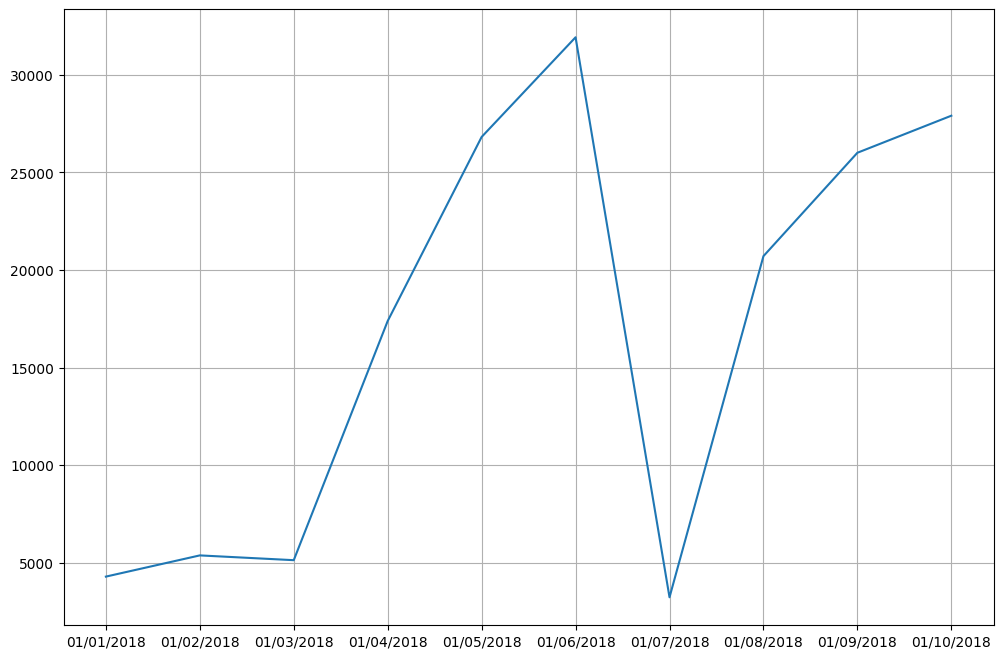

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
# plt.plot(df_daily[:10]['Rented Bike Count'])
plt.plot(df_daily_dtype[0:10]['Rented Bike Count'])
plt.grid()


b) Show overlaying histograms of `Wind speed (m/s)` by `Seasons`. (10 points)

*Your answer:*

In [ ]:
df_daily_dtype.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 01/01/2018 to 31/12/2017
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Rented Bike Count         365 non-null    int64         
 1   Temperature(C)            365 non-null    float64       
 2   Wind speed (m/s)          365 non-null    float64       
 3   Dew point temperature(C)  365 non-null    float64       
 4   Seasons                   365 non-null    object        
 5   Holiday                   365 non-null    object        
 6   Date                      365 non-null    datetime64[ns]
 7   DayOfWeek                 365 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 25.7+ KB


<BarContainer object of 365 artists>

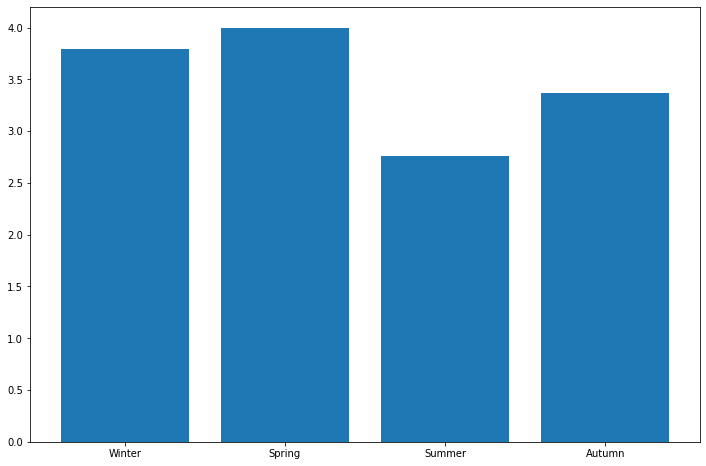

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(df_daily_dtype['Seasons'], df_daily_dtype['Wind speed (m/s)'])



c) Is there a relationship between `Temperature(C)` and `Dew point temperature(C)`? Use a proper visual tool to show it. (5 points)

*Your answer:*

In [ ]:
df_daily_dtype_corr=df_daily_dtype.corr()
df_daily_dtype_corr

,Rented Bike Count,Temperature(C),Wind speed (m/s),Dew point temperature(C)
Rented Bike Count,1.000000,0.699824,-0.174859,0.602648
Temperature(C),0.699824,1.000000,-0.258956,0.962614
Wind speed (m/s),-0.174859,-0.258956,1.000000,-0.284104
Dew point temperature(C),0.602648,0.962614,-0.284104,1.000000


In [ ]:
df_daily_dtype_corr['Temperature(C)']['Dew point temperature(C)']

0.9626136983022565

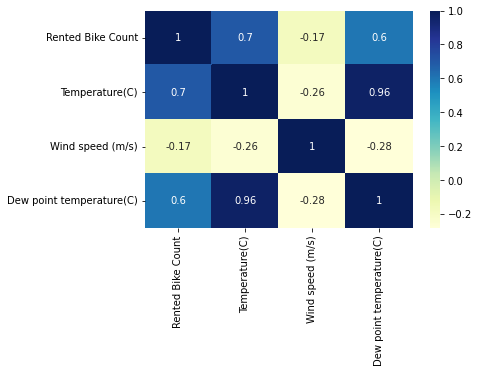

In [ ]:
sns.heatmap(df_daily_dtype_corr, cmap='YlGnBu', annot=True)

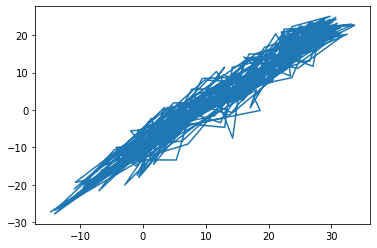

In [ ]:
plt.plot(df_daily_dtype['Temperature(C)'], df_daily_dtype['Dew point temperature(C)'])
# prove corelation of data

d) Does the demand depend on `Temperature(C)` and `Holiday`? Use proper visualization to demonstrate your point. (10 points)

*Your answer:*

<BarContainer object of 365 artists>

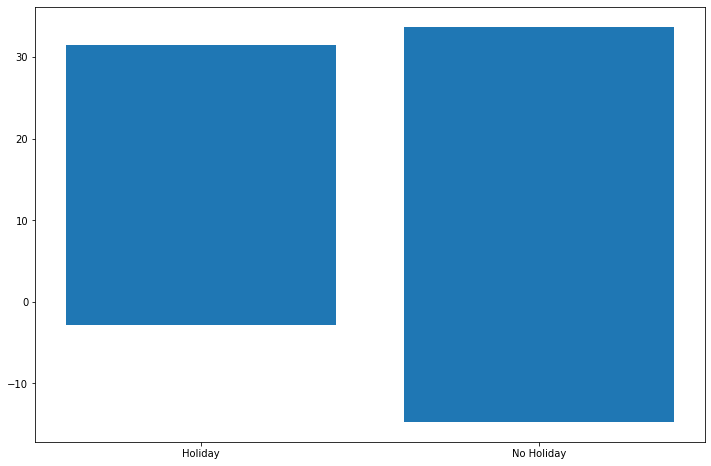

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(df_daily_dtype['Holiday'], df_daily_dtype['Temperature(C)'])